<a href="https://colab.research.google.com/github/positmin/positmin/blob/main/04_1_0_xgboost_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20221011

In [ ]:
#10:10
# colagb에서는 기본적으로 xgboost 0.9가 설치되어 있으므로
# 설치하지 않아도 됨 17:11 단, jupyter에서는 설치해야함
# !pip install xgboost

In [ ]:
import xgboost as xgb
# 전용 데이터 타입을 사용
dtrain = xgb.DMatrix('/content/drive/MyDrive/00_05_1_daejeon/data/agaricus.txt.train.txt') 
dtest = xgb.DMatrix('/content/drive/MyDrive/00_05_1_daejeon/data/agaricus.txt.test.txt') 
# 가지치기를 위한 파라미터
# 이진 분류기 : logistic function으로 0~1 사이의 확률값으로 매핑해서 처리
# 'objective' : 'binary:logistic' 목적함수, 비용함수(신경망)
#
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic'}
num_round = 2
# booster를 사용
bst = xgb.train(param, dtrain, num_round)

preds = bst.predict(dtest)
print(preds[:5])

[22:37:31] 6513x127 matrix with 143286 entries loaded from /content/drive/MyDrive/00_05_1_daejeon/data/agaricus.txt.train.txt
[22:37:31] 1611x127 matrix with 35442 entries loaded from /content/drive/MyDrive/00_05_1_daejeon/data/agaricus.txt.test.txt
[0.28583017 0.9239239  0.28583017 0.28583017 0.05169873]


In [ ]:
import matplotlib.pyplot as plt 
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
## train 8, test 2로 나눕니다 10:45
import xgboost as xgb
from sklearn.metrics import mean_squared_error
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
# 컬럼 이름문제 : graphiviz의 문제  - 열이름이 문제
# data.rename(columns = lambda x:x.replace(' ','_'), inplace = True)
X, y = data.iloc[:,:-1],data.iloc[:,-1]
# DMatrix 형태로 데이터를 변환
data_dmatrix = xgb.DMatrix(data =X, label = y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 123)



# regression 선형 회귀
# XGBRegressor
# scikits와 호환 : gridsearchCV를 사용하기 위해서 열어 놓았음
# hyper parameter tuning
# keras => deep learning인데 scikits -> pipeline, gridsearchcv를 사용하기 위해서 
# 분류 : multi : softmax => deep learning에서 분류함수 
# 컬럼의 수
# booster 알고리즘 : 차를 구해서 이걸 학습을 통해 줄여나가는 것
# learning-rate : 학습량을 차이값에 비례해서
# 학습률 - 학습률이 클 수도 있고 작을 수도 있음 10:39
# 학습률이 커지면 학습속도 : 속도가 빨라짐
# 학습률이 작으면 학습속도가 느려짐
# alpha : L1, lambda : L2, gamma : L0 총량을 규제 10:42
# XGboost = boost 알고리즘 + GPU + 분산처리 + 병렬처리
# 실제값과 예측치와의 차이(차이가 난 데이터에 가중치를 부여)를 이용해서 이를 줄여나가는 학습
xg_reg = xgb.XGBRegressor(booster = 'gbtree', objective = 'reg:linear', colsample_bytree = 0.3,
          learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
# DataFrame 데이터 사용
xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)
# score ( 독립변수, 종속변수가 들어감)
# cross_val_score (모델, 독립변수, 종속변수)
# sklearn.metrics (실제값, 예측값) <- 여기에
rmse = np.sqrt(mean_squared_error(y_test, preds))
# mse : 차의 제곱의 평균으로 평가 :
# 회귀와 분류 : 회귀일 경우 평가 
print("RMSE: %f" % (rmse)) # root mean square error 6.189259

[22:37:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 6.189259


In [ ]:
# 회귀인 경우의 r2(설명력)값을 확인해 보시오
# 정답
from sklearn.metrics import r2_score

In [ ]:
# 정답
r2_score(y_test, preds)

0.25128853460565626

In [ ]:
!apt-get -qq install -y graphviz && pip install -q pydot # 03_DT_GridSearchCV
!apt-get install graphviz libgraphviz-dev pkg-config

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 12 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bio

In [ ]:
!pip install pygraphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 118 kB 36.4 MB/s 
  Created wheel for pygraphviz: filename=pygraphviz-1.7-cp37-cp37m-linux_x86_64.whl size=165752 sha256=e53a7ca73ef7ef77546a7a423b3c5d875634cd09d6e584f31a83a22d54879e00
  Stored in directory: /root/.cache/pip/wheels/8c/bc/0c/ac35392b72556e75107ff610cb31b313e8471918a6d280e34c
Successfully built pygraphviz


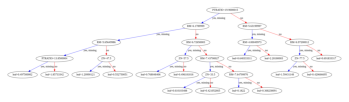

In [ ]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [300, 100]
plt.show()

In [ ]:
# booster를 이용한 Regression, Classifier
#  - DMatrix를 사용
#  - eta
# XGBRegressor, XGBClassifier
# - scikit - learn하고 매핑 : DataFrame을 사용
# - learning-rate

In [ ]:
# cross validation, train ## 11:29
params = {"objective":"reg:squarederror",'colsample_bytree':0.3, 'learning_rate' : 0.1,
            'max_depth' : 5, 'alpha' : 10} ## 패러미터를 주고
# 전용 데이터 타입
# kfold -> nfold 이름만 변경
# 항상 같은 결과를 보기 위해서 
cv_results = xgb.cv(dtrain=data_dmatrix, params = params, nfold = 3,
                    num_boost_round = 50, early_stopping_rounds = 10, metrics = "rmse",
                    as_pandas=True, seed=123) ## 시드는 뭐 똑같은 결과가 나오기 위해서
print(cv_results.head())
print((cv_results["test-rmse-mean"]).tail(1))


   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0        12.883154        0.167322       12.887729       0.381811
1        11.811287        0.149275       11.833228       0.369544
2        10.847052        0.148101       10.883620       0.350111
3         9.989303        0.129353       10.044608       0.358638
4         9.220630        0.104656        9.304659       0.350161
49    3.995757
Name: test-rmse-mean, dtype: float64


In [ ]:
xg_reg = xgb.train(params=params, dtrain = data_dmatrix, num_boost_round=10)

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [300, 100]
plt.show()

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5,5]
plt.show()

In [ ]:
from xgboost.sklearn import XGBRegressor
import scipy.stats as st
params = {
    "n_estimators" : st.randint(3, 40), # 랜덤 인트(randint)이라서 3, 4, 5, 6, 7, 8, 40은 허용 안 됨
    "max_depth" : st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4), # 균등 분포
    "gamma" : st.uniform(0, 10),
}
# reg:linear 대신 'reg:squarederror'를 써주어야 함
# core를 -1만큼 사용하라 ( 다 사용하라 )
xgbreg = XGBRegressor(objective = 'reg:squarederror', nthreads= -1, n_jobs = -1)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(xgbreg, params, n_jobs=1)# cpu
gs.fit(X_train, y_train)
gs.best_estimator_
## https://xgboost.readthedocs.io/en/stable/parameter.html
## verbosity [default=1]

XGBRegressor(gamma=5.524804086648333, learning_rate=0.25198514246351594,
             max_depth=12, n_estimators=17, n_jobs=-1, nthreads=-1,
             objective='reg:squarederror')

In [ ]:
## https://xgboost.readthedocs.io/en/stable/parameter.html
## Learning Task Parameters
## Specify the learning task and the corresponding learning objective. The objective options are below:
## objective [default=reg:squarederror]

In [ ]:
## Hadoop 분산처리 ( 파일을 기반 )
## Spark -> hadoop 위에서 메모리기반으로 분산처리
## Dask 분산 처리
## Ray 뜨는 분산처리, 병렬처리

## threads 동시에 처리하는 process -> cpu 처리속도가 빠름
## - 시분할로 데이터를 분할 처리
## database는 동시에 10개 이상의 Thread(쓰레드)가 동작

# 문제 : 12:15
- XGBoostClassifier
- pima.csv 데이터를 로딩해서 XGBClassifier로 분류하고 그 정확도를 출력하시오
- (sklearn.metrics.accuracy_score()를 이용)


In [ ]:
from xgboost import XGBClassifier
dataset = pd.read_csv("/content/drive/MyDrive/00_05_1_daejeon/data/pima.csv")
print(dataset.shape)
dataset.head() ## type는 종속변수 Yes no로 구성되어 있음

(332, 9)


,Unnamed: 0,npreg,glu,bp,skin,bmi,ped,age,type
0,1,6,148,72,35,33.6,0.627,50,Yes
1,2,1,85,66,29,26.6,0.351,31,No
2,3,1,89,66,23,28.1,0.167,21,No
3,4,3,78,50,32,31.0,0.248,26,Yes
4,5,2,197,70,45,30.5,0.158,53,Yes


In [ ]:
X = dataset.iloc[:, 0:dataset.shape[1]-1]
y = dataset.iloc[:,dataset.shape[1]-1]
y = np.where(y=='Yes', 1, 0)
y = pd.Series(y)

In [ ]:
from sklearn.model_selection import train_test_split
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state= seed)
model = XGBClassifier(n_jobs = -1, learning_rate=0.1, max_depth=2, random_state = 200)
model.fit(X_train, y_train)
print(model)

XGBClassifier(max_depth=2, n_jobs=-1, random_state=200)


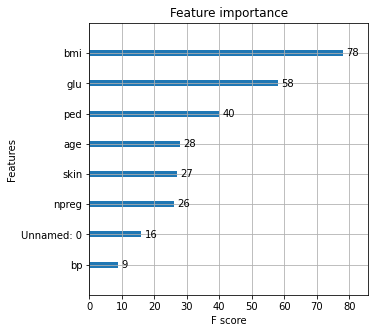

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(model)
pyplot.show()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train = model.predict(X_train)
print(y_pred_train)
accuracy = accuracy_score(y_train, y_pred_train)
print("훈련정확도 : %.2f%%" % (accuracy * 100.0))

[0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0
 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0
 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0]
훈련정확도 : 92.34%


In [ ]:
# 문제 : test 정확도를 출력하시오. 변수 선택법을 적용하여 feature_selection
# SelectFromModel로 정확도를 개선하시오. 12:30

In [ ]:
# 문제 : test 정확도를 출력하시오.
# 정답 # 위에 있는 거 X_test, y_pred로 바꾸기만 하면 됨
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("테스트정확도 : %.2f%%" % (accuracy * 100.0))

[0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0]
테스트정확도 : 76.36%


In [ ]:
# 변수 선택법을 적용하여 feature_selection을 사용하고
# SelectFromModel로 정확도를 개선하시오.
# 즉 from sklearn.feature_selection import SelectFromModel
# 정답
from sklearn.feature_selection import SelectFromModel
print(model.feature_importances_)
thresholds = np.sort(model.feature_importances_) # 왜 정렬을 해야하는가?
print(thresholds)
print(np.sum(thresholds))

[0.07623294 0.12675966 0.32704356 0.00727361 0.07634069 0.11367478
 0.09705225 0.17562254]
[0.00727361 0.07623294 0.07634069 0.09705225 0.11367478 0.12675966
 0.17562254 0.32704356]
1.0


In [ ]:
# 13:00
from sklearn.feature_selection import SelectFromModel
for thresh in thresholds: 
  selection = SelectFromModel(model, threshold=thresh, prefit=True)
  select_X_train = selection.transform(X_train)
  print(type(select_X_train))
  selection_model = XGBClassifier(use_label_encoder=False)
  selection_model.fit(select_X_train, y_train)
  select_X_test = selection.transform(X_test)
  y_pred = selection_model.predict(select_X_test)
  predictions = [round(value) for value in y_pred]
  accuracy = accuracy_score(y_test, predictions)
  print("Thresh=%.3f,n=%d, Accuracy: %.2f%%" % (thresh,
                  select_X_train.shape[1], accuracy*100.0))

<class 'numpy.ndarray'>
Thresh=0.007,n=8, Accuracy: 72.73%
<class 'numpy.ndarray'>
Thresh=0.076,n=7, Accuracy: 76.36%
<class 'numpy.ndarray'>
Thresh=0.076,n=6, Accuracy: 77.27%
<class 'numpy.ndarray'>
Thresh=0.097,n=5, Accuracy: 77.27%
<class 'numpy.ndarray'>
Thresh=0.114,n=4, Accuracy: 77.27%
<class 'numpy.ndarray'>
Thresh=0.127,n=3, Accuracy: 76.36%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromMode

<class 'numpy.ndarray'>
Thresh=0.176,n=2, Accuracy: 77.27%
<class 'numpy.ndarray'>
Thresh=0.327,n=1, Accuracy: 78.18%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
thresh=0.327
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
selection_model = XGBClassifier()
selection_model.fit(select_X_train, y_train)
select_X_test = selection.transform(X_test)
y_pred = selection_model.predict(select_X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.7818181818181819

# 위의 결과로 만들어진 모델에 대하여 n_estimators, max_depth, learning_rate, gamma에 대하여 hyper parameter tuning을 하고 best_params_를 출력하시오

In [ ]:
# 모델
# selection_model : 변수선택이 완료된 모델
from sklearn.model_selection import RandomizedSearchCV
params = {
    "n_estimators": st.randint(3,40),
    "max_depth":st.randint(3,40),
    "learning_rate": st.uniform(0.05, 0.4),
    "gamma": st.uniform(0, 10),
}
# cv가 없으면 : to use the default 5-fold cross validation,
gs = RandomizedSearchCV(selection_model, params, n_jobs=1, verbose=0)
# transform된 데이터를 입력
gs.fit(select_X_train, y_train)
gs.best_params_

{'gamma': 7.52284609084451,
 'learning_rate': 0.20821775297151096,
 'max_depth': 23,
 'n_estimators': 37}

- train data evaluation

In [ ]:
# 데이터는 X_train으로 하면 안됨 : 일치시켜야 함
from sklearn.metrics import accuracy_score
y_pred_train = gs.best_estimator_.predict(select_X_train) # gs.predict도 가능함
print(y_pred_train)
# gs.score()
# score, cross_val_score, accuracy_score 구분
# 모델없이 결과만 가지고 평가 14:48
accuracy = accuracy_score(y_train, y_pred_train)
print("훈련정확도 : %.2f%%" % (accuracy * 100.0))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0]
훈련정확도 : 77.93%


- test data evaluation

In [ ]:
y_pred = gs.predict(select_X_test) # best_estimator_가 작동
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
accuracy ## 아까 같은 경우에도 test data와 훈련정확도가 비슷해야해요 14:40

0.8090909090909091

In [ ]:
# 메모리를 그대로 저장 - 로딩 16:10
import pickle
# 파일 open
pickle.dump(model, open("pima.pickle.dat", "wb")) # write + binary - 메모리 내용 그대로 저장
loaded_model = pickle.load(open("pima.pickle.dat", "rb")) # read + binary
# 메모리 저장 - 로딩, 병렬처리, 파일 캐싱도 지원 : 대양데이터를 이용하는 툴
import joblib
joblib.dump(model, "pima.joblib.dat")
loaded_model = joblib.load("pima.joblib.dat")

y_pred = loaded_model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.36%


In [ ]:
train_set = pd.read_csv('/content/drive/MyDrive/00_05_1_daejeon/data/people.data',
                        header = None)
test_set = pd.read_csv('/content/drive/MyDrive/00_05_1_daejeon/data/people.test',
                       skiprows=1, header = None)
train_set.head()
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
test_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [ ]:
# 열이름
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# 문제 : 분류 16:25
- 1. 결측치 처리를 하시오 - 일부 데이터에 ?가 있음
- 2. 테스트 데이터의 14번째 열에 데이터는 >=, <만 표시되어야 하는데, 끝에 .이 있음, 고쳐보시오.
- 3. Object는 범주형 데이터이어야 하는데 object로 있어 학습이 곤란 이를 수정하시오 <- 여기까지만 같이 해보겠습니다
- 4. 초기 모델을 만들고 평가하시오. (Booster 사용 불가 -> 사용할 수 없음, XGBClassifier를 사용할 것)
- 5. 모델을 GridSearchCV를 이용하여 개선하시오. (Hyper parameter를 선택 적용)
  - 한 개도 좋음
- 6. 모델을 저장하고 다시 로딩한 다음 테스트에 대하여 평가해 보시오

In [ ]:
# 결측치 처리를 하시오 - 일부 데이터에 ?가 있음
print(train_set.shape)
np.sum(train_set.isna())
np.sum(train_set.replace('?', np.nan).isna())

(32561, 15)


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [ ]:
# 테스트 데이터의 14번째 열에 데이터는 >=, <만 표시되어야 하는데, 끝에 .이 있음, 고쳐보시오.
train_set.replace('?', np.nan).dropna().shape
train_nomissing = train_set.replace('?', np.nan).dropna()
test_nomissing = test_set.replace('?', np.nan).dropna()

In [ ]:
test_nomissing['wage_class'].unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [ ]:
test_nomissing['wage_class'] = test_nomissing.wage_class.replace(
    {' <=50K': '<=50K', '>50K.':' >50K'})
test_nomissing.wage_class.unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [ ]:
combined_set = pd.concat([train_nomissing, test_nomissing], axis = 0)
combined_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  wage_class      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [ ]:
# pandas에서 object가 나오면 무슨 데이터타입인가? -> 문자열 데이터 타입
# Object는 범주형 데이터이어야 하는데 object로 있어 학습이 곤란하다. 이를 수정하시오
for feature in test_nomissing.columns:
  if test_nomissing[feature].dtype == 'object':
    print(test_nomissing[feature].unique())

[' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 5th-6th' ' Assoc-voc'
 ' 9th' ' 12th' ' 1st-4th' ' Preschool']
[' Never-married' ' Married-civ-spouse' ' Widowed' ' Divorced'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse']
[' Machine-op-inspct' ' Farming-fishing' ' Protective-serv' ' ?'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transport-moving' ' Handlers-cleaners' ' Armed-Forces']
[' Own-child' ' Husband' ' Not-in-family' ' Unmarried' ' Wife'
 ' Other-relative']
[' Black' ' White' ' Asian-Pac-Islander' ' Other' ' Amer-Indian-Eskimo']
[' Male' ' Female']
[' United-States' ' ?' ' Peru' ' Guatemala' ' Mexico'
 ' Dominican-Republic' ' Ireland' ' Germany' ' Philippines' ' Thailand'
 ' H

In [ ]:
for feature in combined_set.columns:
  if combined_set[feature].dtype == 'object':
    combined_set[feature] = pd.Categorical(combined_set[feature]).codes

In [ ]:
# train/test 분리 : 독립변수
print(train_nomissing.shape[0])
final_train = combined_set[:train_nomissing.shape[0]]
final_test = combined_set[train_nomissing.shape[0]:]
len(final_test)

32561


16281

In [ ]:
# 종속변수 분리
y_train = final_train.pop('wage_class') # 급여 등급
y_test = final_test.pop('wage_class')

In [ ]:
## 04_1_1_XGBoost_GPU.ipynb
## 런타임 유형 변경 : GPU

# GPU에서 모델을 구현하는 방법
# 데이터를 GPU의 메모리로 전송 -> 행렬연산 -> 결과를 cpu의 메모리로 가지고 옴
# GPU는 부동소수점 연산기가 1024개 : 100 - coin(비트코인)
# CPU는 multi core : 8개 -> CPU 100개 이상 => 1000만원 
# 24시간을 경과하면 자동으로 꺼짐 -> 꺼진 이후에 다시 학습하도록 나중에 조절
# CPU 1개에 GPU 3~4 : 병렬처리 => reduce해서 처리
from xgboost import XGBClassifier
xgb1 = XGBClassifier(tree_method='gpu_hist', gpu_id=0) ## 나도 이거 처음 돌려보네
xgb1.fit(final_train,y_train)
print(xgb1)

XGBClassifier(gpu_id=0, tree_method='gpu_hist')


In [ ]:
result = xgb1.predict(final_test)
print(result)
score = (result == y_test).mean()
print(score)

[0 0 0 ... 2 0 2]
0.0


In [ ]:
from sklearn.model_selection import GridSearchCV
cv_params = {'max_depth': [3,5,7], 'min_child_weight':[1,3,5], 'n_estimators': [100, 300, 500, 1000]}
ind_params = {'learning_rate':0.1, 'seed':0, 'subsample':0.8, 'colsample_bytree':0.8,
              'objective':'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params),
                             cv_params,
                             scoring = 'accuracy', cv = 5, n_jobs = -1)